The model is conditional M1


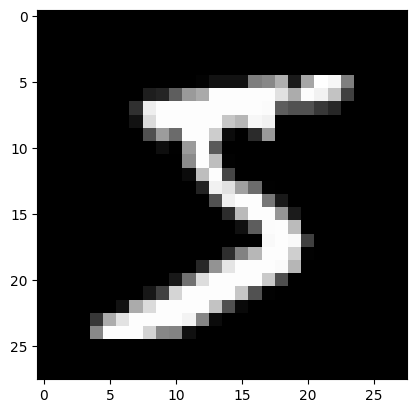

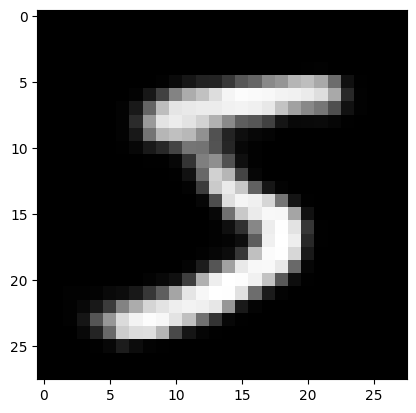

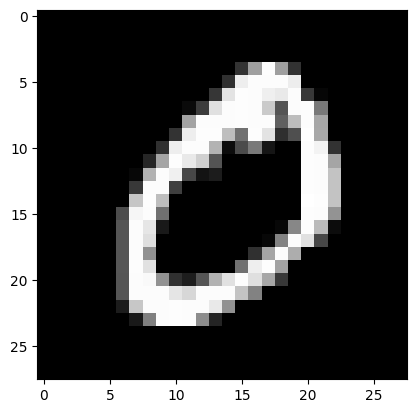

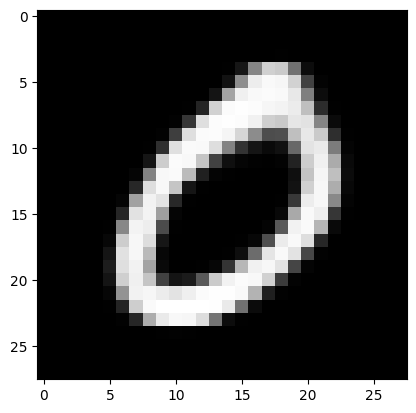

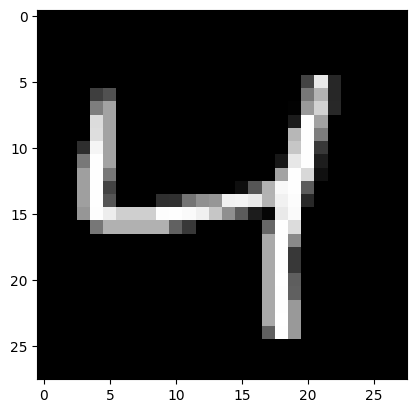

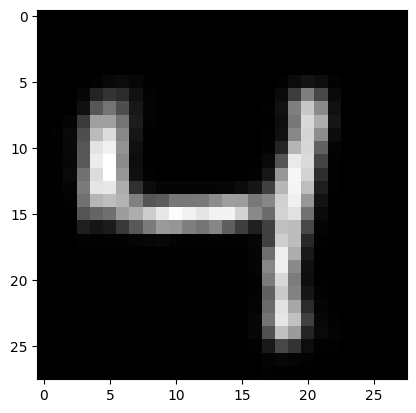

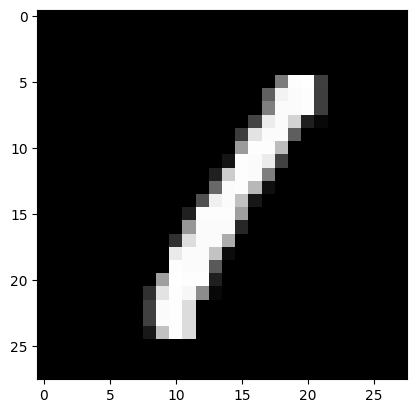

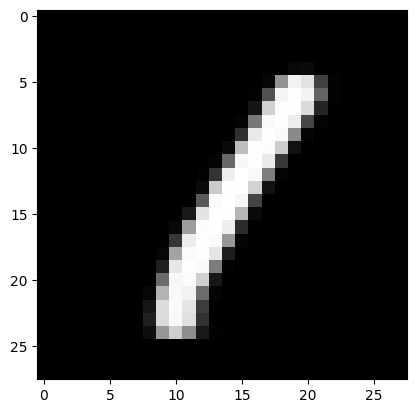

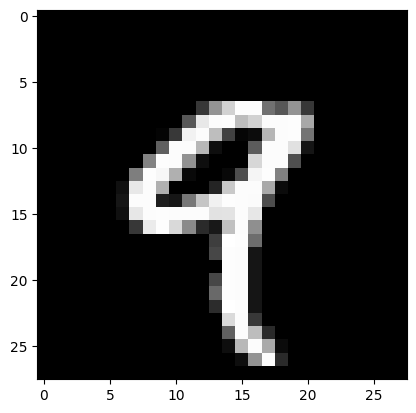

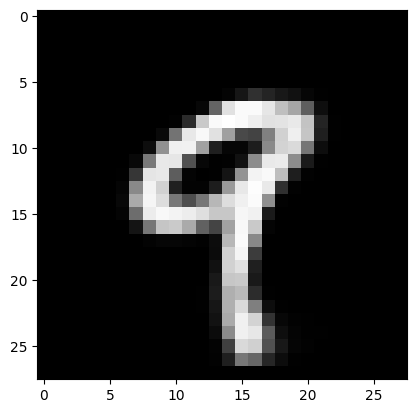

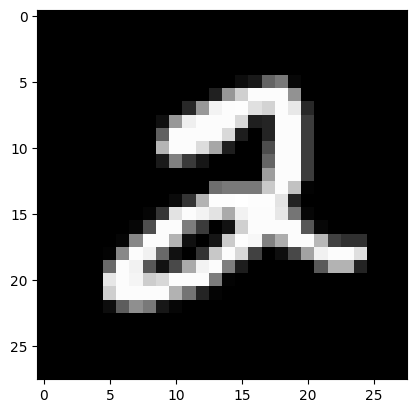

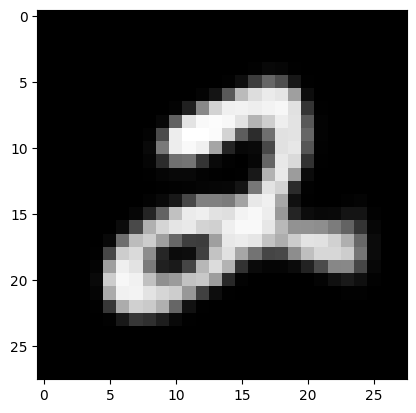

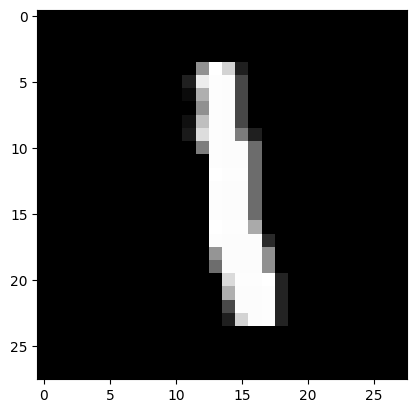

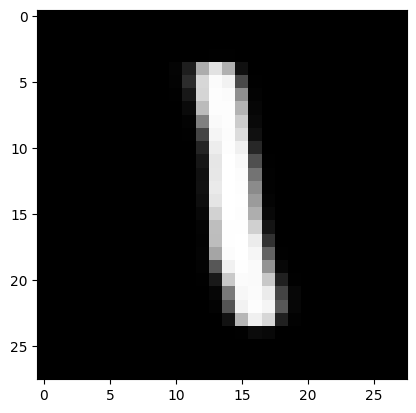

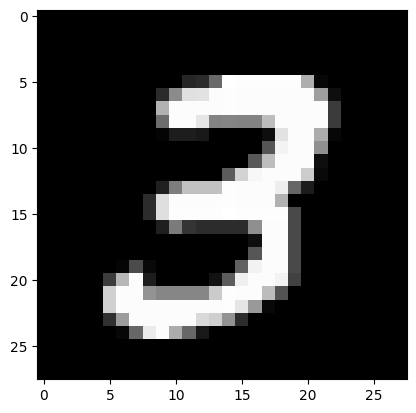

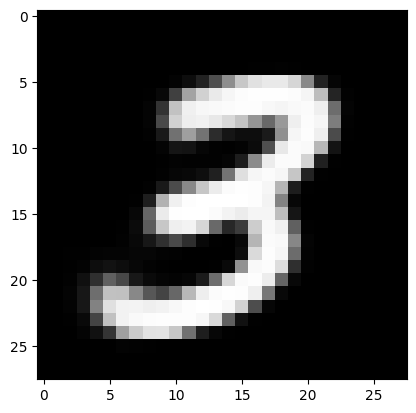

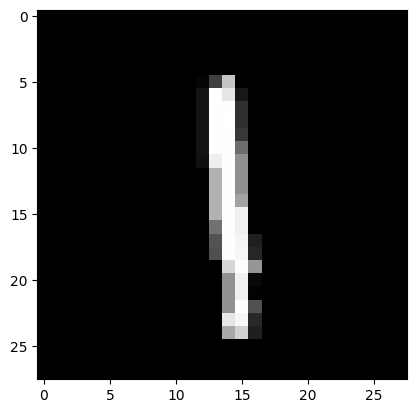

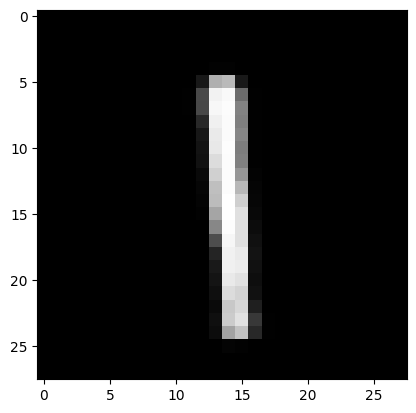

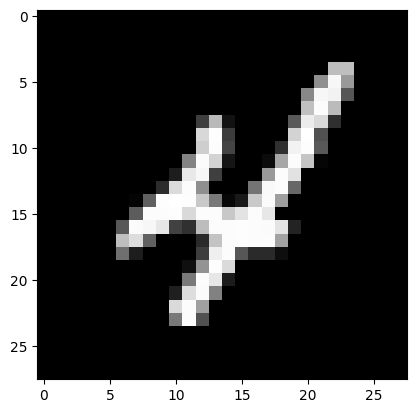

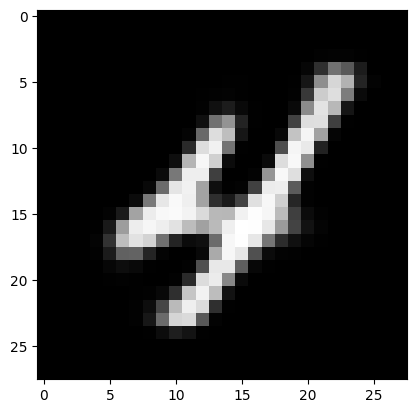

In [5]:
from Optimization import *
from DataLoader import *
from utils import *
import torch
import argparse
import matplotlib.pyplot as plt
Loader = ClassDataLoader()
data = Loader.Load()

device = torch.device('cuda:' + '{}'.format(1))
torch.manual_seed(42)

algorithm = 'ConditionalM1'
latent_dim = 200
hidden_layers = 400
Trainer = ClassOptimization(model_type = algorithm, latent_dimension=latent_dim, device=device, lr=1, batch_size=32, alpha=0.1, epochs=-1, hidden=hidden_layers, num_label=-1)

model_name = algorithm

model = Trainer.model
model = model.to(device)
load = os.path.join('Parameters/'+algorithm, model_name+".pth")

model.load_state_dict(torch.load(load))
os.makedirs('TrainingCurve/'+algorithm, exist_ok=True)
history_load = os.path.join('TrainingCurve/'+algorithm, model_name+".npy")
history = np.load(history_load)
# ===================
# Display data
# ===================
train_x, train_y, valid_x, valid_y, test_x, test_y = data
def N2T(data, data_type=torch.float32): return torch.tensor(data, device=device, dtype=data_type)
def D2H(data, num_classes=10): return torch.nn.functional.one_hot(torch.tensor(data, device=device), num_classes=num_classes)

x = N2T(train_x)
y = D2H(train_y)
if algorithm !='M1':
    # rec_x, mean, std, rec_y = model(x, y)
    rec_x, mean, std = model(x, y)
elif algorithm=='M1':
    rec_x, mean, std = model(x)
for _ in range(10):
    display(x[_])
    display(rec_x[_])

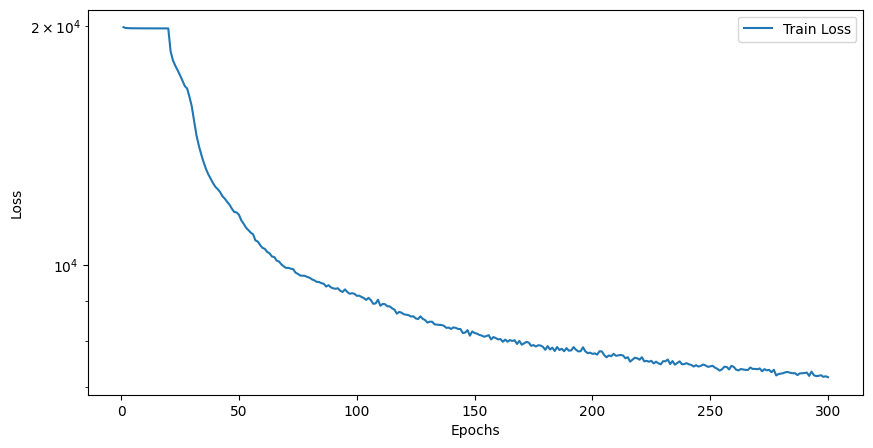

In [9]:
# ===================
# Training Curve Plot
# ===================
loss = history[:,0]
# loss_valid = history[:,1]
epochs = np.arange(1, len(loss) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Train Loss')
# plt.plot(epochs, loss_valid, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()